In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df =pd.read_csv("../data/cleaned_data123.csv")

In [4]:
df_clustering = df.select_dtypes(include=['int64', 'float64'])

In [5]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_clustering)

In [6]:
KMeans = KMeans(n_clusters=3, random_state=42)
KMeans.fit(x_scaled)
clusters = KMeans.labels_
df['cluster'] = clusters

In [7]:
score = silhouette_score(x_scaled, clusters)
print(f"silhouette Score: {score:.3f}")

silhouette Score: 0.050


In [8]:
# for k in range(2, 10):
#     model = KMeans(n_clusters=k, random_state=42)
#     model.fit(x_scaled)
#     score = silhouette_score(x_scaled, model.labels_)
#     print(f"k={k}, Silhouette Score: {score:.3f}")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(x_scaled)
    labels = model.labels_
    score = silhouette_score(x_scaled, labels)
    print(f"k={k} → Silhouette Score = {score:.3f}")

k=2 → Silhouette Score = 0.052
k=3 → Silhouette Score = 0.050
k=4 → Silhouette Score = 0.048
k=5 → Silhouette Score = 0.048
k=6 → Silhouette Score = 0.047
k=7 → Silhouette Score = 0.045
k=8 → Silhouette Score = 0.047
k=9 → Silhouette Score = 0.047
k=10 → Silhouette Score = 0.048


In [9]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(x_scaled)

# Check how many clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters found by DBSCAN:", n_clusters)

# Silhouette Score (only if >1 cluster found)
if n_clusters > 1:
    score = silhouette_score(x_scaled, labels)
    print(f"Silhouette Score (DBSCAN): {score:.3f}")
else:
    print("Not enough clusters to compute silhouette score.")


Number of clusters found by DBSCAN: 0
Not enough clusters to compute silhouette score.


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_pca = pca.fit_transform(x_scaled)

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(x_pca)
    labels = model.labels_
    score = silhouette_score(x_pca, labels)
    print(f"k={k} → Silhouette Score (PCA): {score:.3f}")

k=2 → Silhouette Score (PCA): 0.561
k=3 → Silhouette Score (PCA): 0.526
k=4 → Silhouette Score (PCA): 0.531
k=5 → Silhouette Score (PCA): 0.523
k=6 → Silhouette Score (PCA): 0.519
k=7 → Silhouette Score (PCA): 0.525
k=8 → Silhouette Score (PCA): 0.523
k=9 → Silhouette Score (PCA): 0.524
k=10 → Silhouette Score (PCA): 0.523


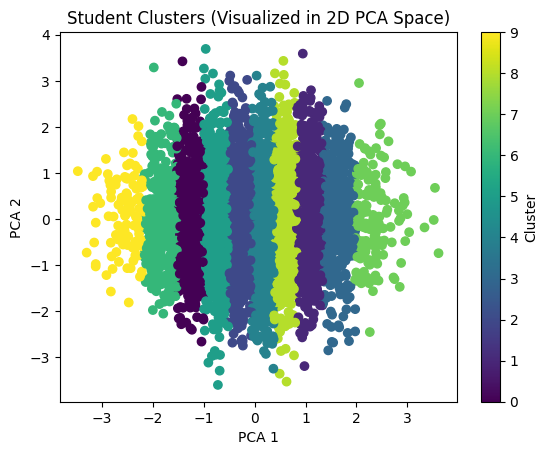

In [11]:
import matplotlib.pyplot as plt

pca_2d = PCA(n_components=2)
x_pca_2d = pca_2d.fit_transform(x_scaled)

plt.scatter(x_pca_2d[:, 0], x_pca_2d[:, 1], c=labels, cmap='viridis')
plt.title("Student Clusters (Visualized in 2D PCA Space)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()


In [12]:
# ✅ Step 1: Add the cluster labels to your original DataFrame
df['Cluster'] = labels

# ✅ Step 2: See what defines each cluster
print(df.groupby('Cluster').mean(numeric_only=True))

# ✅ Step 3 (Optional): Compare to grades (if you have a 'Final_Grade' column)
if 'Final_Grade' in df.columns:
    print(pd.crosstab(df['Cluster'], df['Final_Grade']))

         Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
Cluster                                                                         
0            18.509124   85.501825              2.339416             1.788321   
1            21.123386   75.988522              1.872310             2.377331   
2            19.963164   80.429036              2.157096             2.043337   
3            21.696970   75.020979              1.752914             2.414918   
4            20.082627   79.369703              2.097458             2.149364   
5            18.821111   82.408889              2.228889             1.916667   
6            18.202417   86.879154              2.447130             1.694864   
7            23.036810   70.711656              1.478528             2.619632   
8            20.725086   78.018328              1.950745             2.232532   
9            17.542056   87.747664              2.607477             1.504673   

         Sleep_Hours  Previ

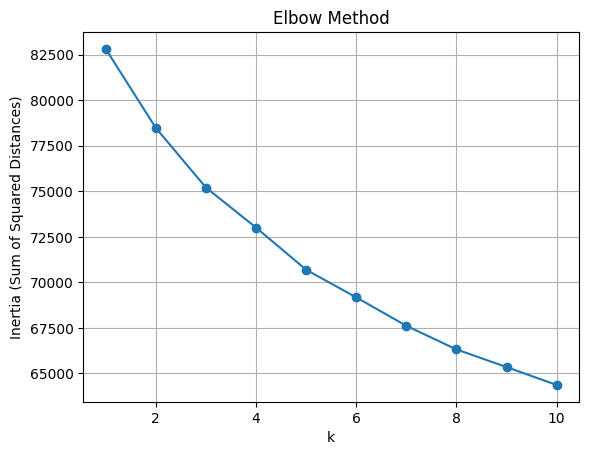

In [13]:
inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(x_scaled)
    inertias.append(model.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method')
plt.grid(True)
plt.show()
